In [3]:
from mlchartist.array_builder import full_dataset_randomised_arrays_
from mlchartist.preprocessing import train_test_split

import pandas as pd
import numpy as np

In [21]:
nasdaq100 = pd.read_csv('../raw_data/nasdaq100.csv', header=None)

In [22]:
nasdaq100_list = list(nasdaq100.values.flatten())

In [23]:
joined_df = pd.DataFrame()

for ticker in nasdaq100_list:
    ticker_path = '../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path)
    joined_df = joined_df.append(ticker_df)
    

In [38]:
# apple = pd.read_csv('../raw_data/processed/aapl.csv')
# google = pd.read_csv('../raw_data/processed/googl.csv')
# amzn = pd.read_csv('../raw_data/processed/amzn.csv')

# joined_df = pd.DataFrame()
# joined_df = joined_df.append(apple)
# joined_df = joined_df.append(google)
# joined_df = joined_df.append(amzn)

joined_df['date'] = pd.to_datetime(joined_df['date'])

FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024
# INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']


joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

joined_df = joined_df[(joined_df['date'].dt.year >= 2000)]

In [39]:
joined_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,ATVI,2005-04-14,35.884780,25.341159,37.271751,-1.446600e+07,-50701887,0.172851,26.320689,16.906418,...,-0.126297,-0.003545,-0.040488,-0.005308,-0.029060,-0.032373,0.023435,False,False,False
1,ATVI,2005-04-15,41.135749,50.858908,37.901933,-1.836342e+07,-42149815,0.177383,25.962193,15.306657,...,-0.123973,-0.050164,-0.062291,-0.020770,0.017590,-0.011982,0.000000,False,False,False
2,ATVI,2005-04-18,38.422456,41.156169,39.118745,-1.973594e+07,-47359352,0.177049,26.097209,14.245694,...,-0.122560,0.005289,-0.031563,0.010540,-0.013840,-0.025656,-0.012167,True,False,True
3,ATVI,2005-04-19,42.506415,56.837791,49.617623,-1.718796e+07,-42620503,0.172838,26.222580,13.553824,...,-0.120353,-0.019037,-0.013840,0.024235,0.014034,-0.030222,0.014034,False,False,True
4,ATVI,2005-04-20,36.346667,2.409639,33.467866,-2.311181e+07,-48544361,0.174764,26.791676,12.452006,...,-0.120241,0.000000,-0.001811,0.060784,-0.032840,-0.044428,-0.022719,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,XLNX,2020-12-17,69.560487,87.063537,88.118588,9.208500e+08,1054341286,4.648527,36.825864,33.097053,...,6.147634,-0.064994,-0.062097,-0.082313,0.000725,0.055610,0.051735,False,False,False
7652,XLNX,2020-12-18,63.852927,64.301231,79.536372,9.197921e+08,1049757108,4.762204,35.909167,29.999363,...,6.106910,-0.051411,-0.033246,-0.075005,-0.017582,0.037266,0.008654,False,False,False
7653,XLNX,2020-12-21,56.536978,35.988414,62.451061,9.200185e+08,1047957568,4.957047,33.771679,26.761617,...,5.956082,-0.037032,-0.027946,-0.028359,-0.026208,-0.025163,-0.020166,False,False,False
7654,XLNX,2020-12-22,54.606950,27.878349,42.722665,9.207713e+08,1046057619,4.912943,31.656648,25.073151,...,5.712705,-0.014290,0.038499,-0.008463,-0.007709,-0.052265,-0.013886,False,True,False


In [34]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'RSI'}>,
        <AxesSubplot:title={'center':'Stochastic'}>,
        <AxesSubplot:title={'center':'Stochastic_signal'}>,
        <AxesSubplot:title={'center':'ATR'}>],
       [<AxesSubplot:title={'center':'ADX'}>,
        <AxesSubplot:title={'center':'ADX_pos'}>,
        <AxesSubplot:title={'center':'ADX_neg'}>,
        <AxesSubplot:title={'center':'MACD'}>],
       [<AxesSubplot:title={'center':'MACD_diff'}>,
        <AxesSubplot:title={'center':'MACD_signal'}>,
        <AxesSubplot:title={'center':'1D_past_return'}>,
        <AxesSubplot:title={'center':'5D_past_return'}>],
       [<AxesSubplot:title={'center':'10D_past_return'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

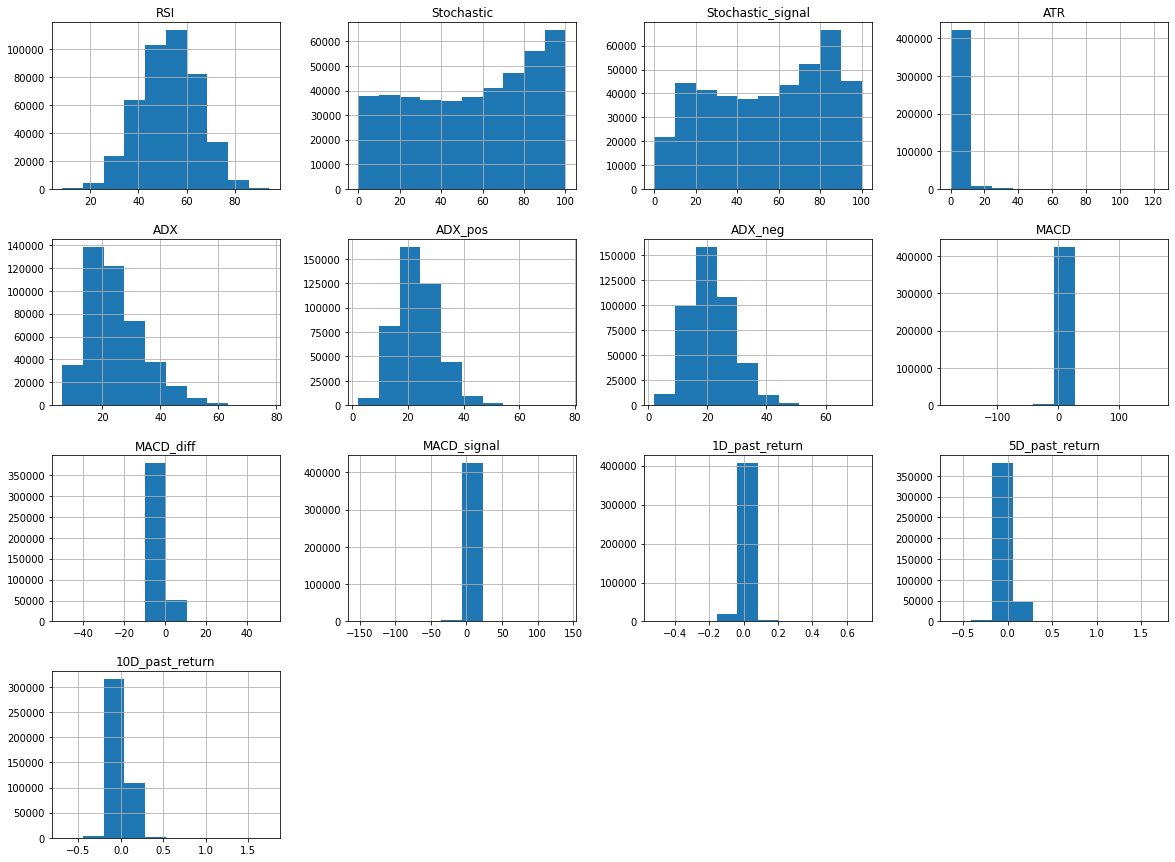

In [40]:
joined_df[INPUT_COLS].hist(figsize=(20, 15))

In [41]:

TARGET_COLS=['5D_return_bin']
outlier_validation={'1D_past_return': [-0.2, 0.2]}

stride = 10


train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays_(joined_df, 
                                                                                stride=stride, 
                                                                                input_cols=INPUT_COLS, 
                                                                                outlier_threshold=1, 
                                                                                outlier_validation=outlier_validation, 
                                                                                check_train_outliers=True,
                                                                                check_test_outliers=True, 
                                                                                target_col=TARGET_COLS, 
                                                                                time_window=30,
                                                                                test_set_size='2Y')

print('')
print('')
print('### Stats ###')
print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('test_x', test_x.shape)
print('test_y', test_y.shape)
print('scaler', scaler)

print('')
print('')
print('### Validation ###')
# 
# print('google_train', len(google_train)/stride)
# print('google_test', len(google_test)/stride)
# print('amazon_train', len(amazon_train)/stride)
# print('amazon_test', len(amazon_test)/stride)

# print('all trains sets', (len(apple_train) + len(google_train) + len(amazon_train))/stride)
# print('all tests sets', (len(apple_test) + len(google_test) + len(amazon_test))/stride)



100 Companies in Dataset
Starting ATVI: Company 1 of 100
Starting ADBE: Company 2 of 100
Starting AMD: Company 3 of 100
Starting ALGN: Company 4 of 100
Starting ALXN: Company 5 of 100
Starting AMZN: Company 6 of 100
Starting AMGN: Company 7 of 100
Starting AAL: Company 8 of 100
Starting ADI: Company 9 of 100
Starting AAPL: Company 10 of 100
Starting AMAT: Company 11 of 100
Starting ASML: Company 12 of 100
Starting ADSK: Company 13 of 100
Starting ADP: Company 14 of 100
Starting AVGO: Company 15 of 100
Starting BID: Company 16 of 100
Starting BIIB: Company 17 of 100
Starting BMRN: Company 18 of 100
Starting CDN: Company 19 of 100
Starting CERN: Company 20 of 100
Starting CHKP: Company 21 of 100
Starting CHTR: Company 22 of 100
Starting TCOM: Company 23 of 100
Starting CTA: Company 24 of 100
Starting CSCO: Company 25 of 100
Starting CTX: Company 26 of 100
Starting CMCSA: Company 27 of 100
Starting COST: Company 28 of 100
Starting CSX: Company 29 of 100
Starting CTSH: Company 30 of 100
St

In [42]:
train_y.shape

(37124, 1)

In [43]:
train_x.shape

(37124, 30, 13)

In [46]:
from tensorflow.keras.metrics import Precision
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam

optim = RMSprop(learning_rate=0.0001)
precision = Precision()

def init_model():
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.001)
    model.add(layers.LSTM(200, return_sequences=True, input_shape=(30,13), activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(200, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

In [47]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

model.fit(train_x, train_y, 
          epochs=500, 
          batch_size=16,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/500
1857/1857 [==============================] - 28s 15ms/step - loss: 1.3619 - precision_2: 0.5280 - accuracy: 0.5277 - val_loss: 0.7046 - val_precision_2: 0.5216 - val_accuracy: 0.5216
Epoch 2/500
1857/1857 [==============================] - 21s 11ms/step - loss: 0.6967 - precision_2: 0.5275 - accuracy: 0.5275 - val_loss: 0.6966 - val_precision_2: 0.5216 - val_accuracy: 0.5216
Epoch 3/500
1857/1857 [==============================] - 27s 15ms/step - loss: 0.6952 - precision_2: 0.5275 - accuracy: 0.5275 - val_loss: 0.6953 - val_precision_2: 0.5216 - val_accuracy: 0.5216
Epoch 4/500
1857/1857 [==============================] - 23s 12ms/step - loss: 0.6949 - precision_2: 0.5275 - accuracy: 0.5275 - val_loss: 0.6954 - val_precision_2: 0.5216 - val_accuracy: 0.5216
Epoch 5/500
1857/1857 [==============================] - 20s 11ms/step - loss: 0.6947 - precision_2: 0.5275 - accuracy: 0.5275 - val_loss: 0.6951 - val_precision_2: 0.5216 - val_accuracy: 0.5216
Epoch 6/500
1857/1857 [==

KeyboardInterrupt: 

In [32]:
test_y.sum()/len(test_y)

0.5160818713450293

In [33]:
model.evaluate(test_x, test_y)

150/150 [==============================] - 0s 3ms/step - loss: 0.6962 - precision: 0.5161 - accuracy: 0.5161


[0.6961860060691833, 0.5160818696022034, 0.5160818696022034]